<a href="https://colab.research.google.com/github/rudevico/Gachon-AISTUDY/blob/main/TensorFlow_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

import tensorflow as tf
from tensorflow import keras

In [2]:
# load the dataset
(X_train, y_train), (X_test, y_test) = \
    keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


**cf. Dataset in TensorFlow, PyTorch**  
**Dataset**이란 X(features)와 y(label)이 함께 포함된 형태를 의미한다.  
(위 cell)따라서 (X_train, y_train)과 같이 지정하면 알아서 X_train에는 X가, y_train에는 y가 보관된다.

**cf. `\`의 사용**  
References. [PEP 8 - Style Guide for Python Code](https://peps.python.org/pep-0008/)  

The Python standard library is conservative and requires **limiting lines to 79 characters** (and docstrings/comments to 72).  
**Backslashes(\\)** may still be appropriate at times. For example, long, multiple with-statements could not use implicit continuation before Python 3.10, so backslashes were acceptable for that case:  
```python
with open('/path/to/some/file/you/want/to/read') as file_1, \
     open('/path/to/some/file/being/written', 'w') as file_2:
    file_2.write(file_1.read())
```

In [3]:
# check the shape and type of X, y
print(f'X_train: Shape {X_train.shape} Type {type(X_train)}, y_train: Shape {y_train.shape} Type {type(y_train)}')
print(f'X_test: Shape {X_test.shape} Type {type(X_test)}, y_test: Shape {y_test.shape} Type {type(y_test)}')

X_train: Shape (60000, 28, 28) Type <class 'numpy.ndarray'>, y_train: Shape (60000,) Type <class 'numpy.ndarray'>
X_test: Shape (10000, 28, 28) Type <class 'numpy.ndarray'>, y_test: Shape (10000,) Type <class 'numpy.ndarray'>


In [4]:
# 만약 sample 수가 너무 많고, y가 continuous value라면,
# np.unique()에 리소스 소모가 클 수 있으므로 먼저 5개만 출력
print(y_train[:5]) # Output: [9 0 0 3 0]
# y가 dicrete인 것을 확인 후에 np.unique() 리턴
print(np.unique(y_train)) # Output: [0 1 2 3 4 5 6 7 8 9]

[9 0 0 3 0]
[0 1 2 3 4 5 6 7 8 9]


In [5]:
# check the labels count
from collections import Counter

# label_counter: Counter({9: 6000, 0: 6000, ..., 4: 6000, 8: 6000}) NO SORTED
label_counter = Counter(y_train)

# x[0]은 Key 기준, x[1]은 Value 기준 정렬
# reverse=False이면 ascending, reverse=True이면 descending
print(sorted(label_counter.items(), key=lambda x: x[0], reverse=False))

[(0, 6000), (1, 6000), (2, 6000), (3, 6000), (4, 6000), (5, 6000), (6, 6000), (7, 6000), (8, 6000), (9, 6000)]


In [6]:
# Logistic Regression

from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier

X_train_scaled = (X_train / 255.0).reshape(-1, 28*28)

sc = SGDClassifier(loss='log_loss', max_iter=5, random_state=42)
scores = cross_validate(estimator=sc,
                        X=X_train_scaled, y=y_train,
                        return_train_score=True,
                        n_jobs=-1)

train_score = np.mean(scores['train_score'])
test_score = np.mean(scores['test_score'])
print(f'train_score: {train_score}, test_score: {test_score}')

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


train_score: 0.8308250000000001, test_score: 0.8196000000000001


In [7]:
# cf. 컴퓨터는 28pixel * 28pixel을 그림으로 이해하지 못한다
# 따라서 .reshape(-1, 28*28)을 통해서 784pixel의 1-dim으로 만든다
# 따라서 60,000개의 이미지는 각각 784개의 x_j값을 가진 데이터 인스턴스이다
X_train_scaled.shape

(60000, 784)

**cf. 위 cell 이어서**  
input: $x^i_j$에 대해서 $i = 0, 1, ..., 59999$ 그리고 $j = 0, 1, ..., 783$  
output: $z_k$에 대해서 $k = 0, 1, ..., 9$  

$x^i$에 대한 $z_k = \Sigma^{783}_{i=0}{(w_{ki}*x_{i})} + b_k$이다.  
* 동일한 $x_i$에 대한 weight라고 하더라도, $z_k$에 따라 weight값이 다르기 때문에 $w_{ki}$라고 표현함.
* 마찬가지로 bias값도 $z_k$에 달라지므로 $b_k$라고 표현함.

$z_k$ 자체는 continuous이며, 이를 $softmax$ function에 통과시킨 값은 다음과 같다.  
* $0<=softmax(z_k)<=1$ 그리고 $\Sigma{softmax(z_k)}=1$

* 즉 각 class에 속할 확률이 된다.

즉 Input Node는 784개이고, Output Node는 10개임. 이 과정을 (X_train_scaled 60,000개 기준) 60,000번 수행하는 것임.

* * *
Deep Learning 분야의 데이터셋은 충분히 크기 때문에 validation score가 안정적이고, cross-validate를 하기에는 시간이 오래 걸리기 때문에 1개의 validation set으로만 검증한다.

In [8]:
# Split train set into train set and validate set
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train_scaled,
                                                  y_train,
                                                  test_size=0.2,
                                                  stratify=y_train,
                                                  random_state=42)

print(f'X_train: Shape {X_train.shape} Type {type(X_train)}, y_train: Shape {y_train.shape} Type {type(y_train)}')
print(f'X_val: Shape {X_val.shape} Type {type(X_val)}, y_val: Shape {y_val.shape} Type {type(y_val)}')

X_train: Shape (48000, 784) Type <class 'numpy.ndarray'>, y_train: Shape (48000,) Type <class 'numpy.ndarray'>
X_val: Shape (12000, 784) Type <class 'numpy.ndarray'>, y_val: Shape (12000,) Type <class 'numpy.ndarray'>


In [9]:
# Create the Dense layer
dense = keras.layers.Dense(units=10, # 다음 neuron(node) 수
                           activation='softmax',
                           input_shape=(784,))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**cf. `keras.layers.Dense()`**  
References. [tf.keras.layers.Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense)  

* **units**: Positive integer, dimensionality of the output space.
    - input layer - output layer 바로 연결되기 때문에 다음 node의 수는 10개(label 종류)
* **activation**: Activation function to use. If you don't specify anything, no activation is applied (i.e. a(x) = x)

In [10]:
# Create the Model
model1 = keras.models.Sequential()
model1.add(dense)

model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │           7,850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

**cf. `model.summary()` 결과 해석**  

**Output Shape**  
* (Batch_size, \*Output_Dimensions)
* 본 예제에서는 Batch_size 없으므로 `None`

**Total params**  
* 해당 layer를 통과하는 parameter 수
* 각 data instance는 784(=28*28) 개의 $x_j$를 가지고 있으므로, $w_j$ 또한 이에 대응하여 784개가 존재함.
* bias 1개를 추가하면 785개임.
* 이때 layer와 연결된 output node가 10개이므로, 785 * 10 = 7,850임.

**Trainable params**  
* 말 그대로, 학습 가능한(= 업데이트 가능한) parameters
* 표에서 **Param #**에 해당함.

**Non-trainable params**  
(지금 수준에서는 알 필요 없다고 판단됨)
* case1. pre-trained model의 일부 layer를 freeze하여 학습 중에 update되지 않도록 설정
* case2. 특정 parameter를 고정하여 학습 과정에서 변경되지 않도록 설정
* case3. `moving mean` 및 `moving variance`와 같은 통계값은 학습 불가능한 parameter로 간주됨.

In [11]:
# Compile the model
# model training 전에 기타 설정을 함
model1.compile(loss='sparse_categorical_crossentropy', \
              metrics=['accuracy'])

# cf. 'sparse_categorical_crossentropy'
# 다중분류 손실함수인 'categorical_crossentropy'는 one-hot encoding필요
# sprase는 one-hot encoding 하지 않아도 가능하도록 해주는 tensorflow 함수
# 바람직하지 않은 방법이지만, 실습이므로 그대로 진행함

**cf. `model.compile()`**  
references. [tf.keras.Model.compile](https://www.tensorflow.org/api_docs/python/tf/keras/Model?_gl=1*iz7k9n*_up*MQ..*_ga*NjI0NTAyODA0LjE3MjI5NTYwNzg.*_ga_W0YLR4190T*MTcyMjk1NjA3Ny4xLjAuMTcyMjk1NjA3Ny4wLjAuMA..#compile)  
> Configures the model for training.  
즉 엄밀히 말하자면 compile보다는 configure가 적절하다.  
위에서는 모델에 대한 layer, activation function 등을 설정했고, 여기서는 optimizer, loss function 등을 설정한다.

```python
# 해당 parameter value들은 default value
compile(
    optimizer='rmsprop', # 아래에서 설명
    loss=None, # 아래에서 설명
    loss_weights=None, # 무시
    metrics=None, # 아래에서 설명
    weighted_metrics=None, # 무시
    run_eagerly=False, # 무시
    steps_per_execution=1, # 무시
    jit_compile='auto', # 무시
    auto_scale_loss=True # 무시
)
```

* **optimizer**: 최적화 함수. 종류는 [여기](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers#classes)를 참고.
* **loss**: 손실 함수. 종류는 [여기](https://www.tensorflow.org/api_docs/python/tf/keras/losses#classes)를 참고.
* **metrics**: 평가 지표. 종류는 [여기](https://www.tensorflow.org/api_docs/python/tf/keras/metrics#classes)를 참고.
    - **`keras`**에서는 기본적으로 epoch마다 loss 값을 출력한다. 이때 loss 값 외에도 추가적인 평가 지표를 출력하기를 원할 때 해당 parameter를 사용할 수 있다.

In [12]:
# Fitting the model
train_epochs = 5
# model.fit()은 기본적으로 epoch마다 loss값을 출력해준다
# 그리고 부가 정보들도 model.fit()이 리턴하는 객체에 담긴다
# 따라서 이 정보들을 추가적으로 이용하기 위해 history라는 변수에 보관하는 것이 바람직한 습관
# ㄴ 추가적이라는 것은 그래프 그리기 등등을 의미함
history = model1.fit(X_train, y_train,
                    batch_size=None, # keras는 기본적으로 mini-batch, size=32 사용
                    verbose=2,
                    epochs=train_epochs)

# cf. 또한 train_val을 사실 위에서 미리 만들지 않고,
# model fitting할 때 설정할 수 있다.
# model.fit(...,  validation_split = 0.1)

Epoch 1/5
1500/1500 - 3s - 2ms/step - accuracy: 0.7927 - loss: 0.6106
Epoch 2/5
1500/1500 - 4s - 3ms/step - accuracy: 0.8390 - loss: 0.4805
Epoch 3/5
1500/1500 - 2s - 2ms/step - accuracy: 0.8462 - loss: 0.4549
Epoch 4/5
1500/1500 - 3s - 2ms/step - accuracy: 0.8506 - loss: 0.4429
Epoch 5/5
1500/1500 - 2s - 1ms/step - accuracy: 0.8533 - loss: 0.4337


In [13]:
# cf. model.fit()이 리턴하는 객체
print(history)

# Output: <keras.src.callbacks.history.History object at 0x7e05ed1d1930>

**cf. `model.fit()`**  
references. [tf.keras.Model.fit](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit)  

```python
fit(
    x=None, # 무시
    y=None, # 무시
    batch_size=None, # 무시
    epochs=1, # 무시
    verbose='auto', # 아래에서 설명
    callbacks=None, # 무시
    ...
)
```

* **verbose**: Verbosity mode.
    - 'auto': default. becomes 1 for most cases.
    - 0: silent.
    - 1: progress bar. interactively하게 진행되는 동안 계속 loss, accuracy 등의 값을 업데이트하며 알려줌.  
    > Note that **the progress bar is not particularly useful** when logged to a file
    - 2: one line per epoch. 에포크 끝날 때마다만 알려줌.

결론은 어지간하면 'auto'나 2로 쓰라는 것.

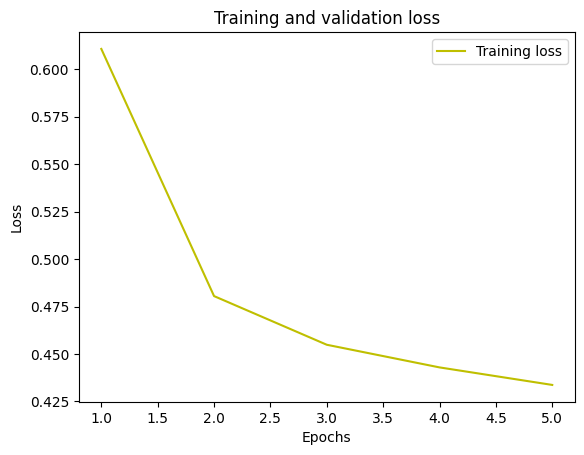

In [14]:
# cf. model.fit()이 리턴하는 객체에 담긴 정보로 그래프 그리기 - loss
import matplotlib.pyplot as plt

loss = history.history['loss']
# val_loss = history.history['val_loss'] # validation 설정 안했으므로 사용x
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
# plt.plot(epochs, val_loss, 'r', label='Validation loss') # 위 comment와 동일
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

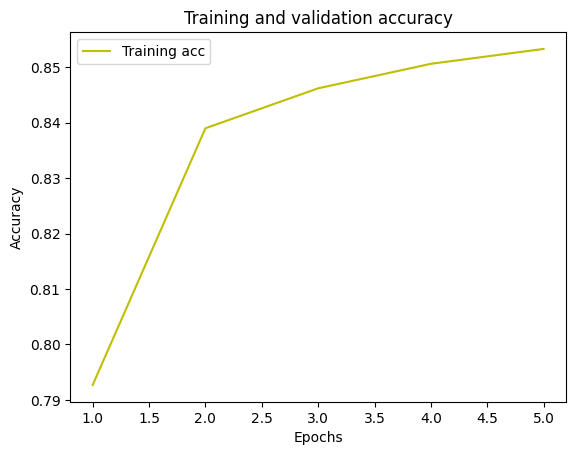

In [15]:
# cf. model.fit()이 리턴하는 객체에 담긴 정보로 그래프 그리기 - accuracy
acc = history.history['accuracy']
# val_acc = history.history['val_accuracy'] # validation 설정 안했으므로 사용x
plt.plot(epochs, acc, 'y', label='Training acc')
# plt.plot(epochs, val_acc, 'r', label='Validation acc') # 위 comment와 동일
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [16]:
# Evaluate the train_val
# 기본적으로 model.compile()에서 지정했던 평가 지표들을 리턴함
model1.evaluate(X_val, y_val,
               verbose=2,
               return_dict=True)

375/375 - 1s - 2ms/step - accuracy: 0.8417 - loss: 0.4593


{'accuracy': 0.8416666388511658, 'loss': 0.45934244990348816}

**cf. `model.evaluate()`**  
references. [tf.keras.Model.evaluate](https://www.tensorflow.org/api_docs/python/tf/keras/Model#evaluate)

In [17]:
# 더 자세한 결과 확인
# model.compile()에서 'metrics'를 이용해서도 확인 가능할 것 같지만,
# 일단 배운대로만 진행함

from sklearn.metrics import classification_report, confusion_matrix

def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)

y_pred = model1(X_val)
y_pred_probs = softmax(y_pred)
y_pred_class = np.argmax(y_pred_probs, axis=1)
y_val_class = y_val # one-hot encoding 안 해서 이렇게 사용
# 만약 했다면, 다음과 같이 했을 거임
# y_val_class = np.argmax(y_val, axis=1)

print(classification_report(y_val_class, y_pred_class,
                            zero_division=0))
print(confusion_matrix(y_val_class, y_pred_class))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83      1200
           1       0.97      0.96      0.97      1200
           2       0.77      0.68      0.72      1200
           3       0.89      0.84      0.86      1200
           4       0.61      0.90      0.73      1200
           5       0.93      0.96      0.94      1200
           6       0.73      0.42      0.53      1200
           7       0.94      0.91      0.93      1200
           8       0.95      0.96      0.96      1200
           9       0.95      0.95      0.95      1200

    accuracy                           0.85     12000
   macro avg       0.85      0.85      0.84     12000
weighted avg       0.85      0.85      0.84     12000

[[1062    6   16   35   13    1   53    0   14    0]
 [   4 1155    6   24    7    1    3    0    0    0]
 [  21    2  820   10  277    0   64    0    5    1]
 [  53   19   18 1008   76    0   22    0    4    0]
 [   2    0   57   27 1078   

In [18]:
# cf.
print(y_pred, end='\n\n\n')
print(y_pred_probs, end='\n\n\n')
print(y_pred_class, end='\n\n\n')
print(y_val_class)

tf.Tensor(
[[1.60384334e-05 2.37586573e-06 6.10236311e-05 ... 1.33775651e-01
  2.13197935e-02 2.14219809e-01]
 [1.24550925e-03 7.37591563e-06 2.58330884e-03 ... 1.27847274e-17
  1.06712156e-04 2.14334129e-19]
 [8.80085449e-10 1.15021703e-09 3.42990241e-08 ... 2.33949292e-02
  4.86990350e-04 1.95877533e-03]
 ...
 [3.50901155e-06 5.97604412e-07 2.90279568e-04 ... 5.51888292e-11
  9.97308254e-01 9.66114341e-11]
 [6.23241474e-04 1.62249162e-05 9.90201294e-01 ... 9.08341446e-15
  1.40880977e-04 1.70691355e-13]
 [5.13346240e-05 2.00800378e-06 2.71983245e-05 ... 1.02983631e-05
  9.99400020e-01 6.76193895e-06]], shape=(12000, 10), dtype=float32)


[[7.0980241e-05 7.1376948e-05 7.3984978e-05 ... 8.2810904e-05
  7.2807983e-05 8.8561705e-05]
 [7.1067567e-05 7.1377304e-05 7.4171832e-05 ... 7.2441842e-05
  7.1279756e-05 7.1484435e-05]
 [7.0979106e-05 7.1376773e-05 7.3980467e-05 ... 7.4156596e-05
  7.1306866e-05 7.1624592e-05]
 ...
 [7.0979353e-05 7.1376817e-05 7.4001939e-05 ... 7.2441842e-05
  1.93

In [19]:
'''cf.
precision   | TP / (TP + FP)
recall      | TP / (TP + FN)
f1-score    | harmonic mean of precision and recall
              (2 * (precision * recall)) / (precision + recall)
              일반적으로 precision과 recall은 trade-off 관계라서 이를 절충할 수 있도록 한 개념임
support     | 각 class의 sample count
accuracy    | (TP + TN) / (TP + TN + FP + FN)
macro avg   | arithmatic mean of precision(각 class들의 precision 평균)
'''

'cf.\nprecision   | TP / (TP + FP)\nrecall      | TP / (TP + FN)\nf1-score    | harmonic mean of precision and recall\n              (2 * (precision * recall)) / (precision + recall)\n              일반적으로 precision과 recall은 trade-off 관계라서 이를 절충할 수 있도록 한 개념임\nsupport     | 각 class의 sample count\naccuracy    | (TP + TN) / (TP + TN + FP + FN)\nmacro avg   | arithmatic mean of precision(각 class들의 precision 평균)\n'

In [20]:
'''cf.
TN  | True Negative(진음성)
FN  | False Negative(위음성)
FP  | False Positive(위양성)
TP  | True Positive(진양성)
'''

'cf.\nTN  | True Negative(진음성)\nFN  | False Negative(위음성)\nFP  | False Positive(위양성)\nTP  | True Positive(진양성)\n'

* * *
* * *
앞선 model network는 input layer(784,)와 output layer(10,)만 있었다.  
이번에는 여기에 hidden layer를 하나 추가해서 **$^{1)}$Multi-layer Perceptron**을 구현한다.  
$^{1)}$cf. [Topic/What is Perceptron.md](https://github.com/rudevico/Gachon-AISTUDY/blob/main/Topic/What%20is%20Perceptron.md)

In [21]:
# cf. 현재까지의 X, y 목록
# X_train, X_val, X_test, y_train, y_val, y_test

In [22]:
# hidden layer
dense1 = keras.layers.Dense(units=100,
                            activation='sigmoid',
                            input_shape=(28*28,),
                            name='hidden_layer_1')
# output layer
dense2 = keras.layers.Dense(units=10,
                            activation='softmax',
                            name='output_layer')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
model = keras.models.Sequential(name='Multi-layer-Perceptron')
model.add(dense1)
model.add(dense2)

model.summary()

# hidden_layer_1의 Param # = 784*100(weights) + 1*100(biases)
# output_layer의 Param # = 100*10(weights) + 1*10(biases)

Model: "Multi-layer-Perceptron"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)               │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
# cf. model에 layer를 추가하는 또 다른 방법
# 해당 방법이 조금 더 model을 dynamic하게 사용할 수 있음
model2 = keras.models.Sequential(name='Multi-layer_Perceptron')
model2.add(keras.layers.Dense(units=100,
                            activation='sigmoid',
                            input_shape=(28*28,),
                            name='hidden_layer_1'))
model2.add(keras.layers.Dense(units=10,
                            activation='softmax',
                            name='output_layer_1'))

model2.summary()

Model: "Multi-layer_Perceptron"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)               │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer_1 (Dense)               │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
model2.compile(loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model2.fit(X_train, y_train, epochs=train_epochs, verbose=2)

Epoch 1/5
1500/1500 - 3s - 2ms/step - accuracy: 0.8034 - loss: 0.5759
Epoch 2/5
1500/1500 - 2s - 2ms/step - accuracy: 0.8496 - loss: 0.4156
Epoch 3/5
1500/1500 - 3s - 2ms/step - accuracy: 0.8617 - loss: 0.3804
Epoch 4/5
1500/1500 - 4s - 3ms/step - accuracy: 0.8719 - loss: 0.3564
Epoch 5/5
1500/1500 - 2s - 1ms/step - accuracy: 0.8762 - loss: 0.3392


In [26]:
model2.evaluate(X_val, y_val,
               verbose=2,
               return_dict=True)

375/375 - 1s - 2ms/step - accuracy: 0.8720 - loss: 0.3509


{'accuracy': 0.871999979019165, 'loss': 0.350943922996521}

* * *
* hidden layer의 activation function을 sigmoid → ReLU로 바꿔본다.  
    **cf. [why is ReLU used as an activation function](https://www.geeksforgeeks.org/why-is-relu-used-as-an-activation-function/)**
* 또한 `.reshape()`로 (28, 28)을 (28*28,)으로 바꿔서 input에 넣었었는데,  
(28, 28) 그대로 넣고 `flatten()`을 사용한다.



In [27]:
model3 = keras.models.Sequential(name='Multi-layer_Perceptron_flatten-x_ReLU')
# Flatten layer를 집중적으로 볼 것
model3.add(keras.layers.Flatten(input_shape=(28, 28),
                                name='flatten_layer'))
model3.add(keras.layers.Dense(units=100,
                             activation='relu',
                             name='hidden_layer'))
model3.add(keras.layers.Dense(units=10,
                             activation='softmax',
                             name='output_layer'))

model3.summary()

# flatten_layer는 학습하는 layer가 아니기 때문에,
# 해당 Neural Network의 depth는 2라고 할 수 있다(hidden, output).

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "Multi-layer_Perceptron_flatten-x_ReLU"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_layer (Flatten)              │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden_layer (Dense)                 │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
# cf. model3에는 flatten_layer가 존재하기 때문에,
# 28pixel * 28pixel의 2-dim 데이터를 28*28의 1-dim으로 미리 변형하지 않아도 된다.

(X_train, y_train), (X_test, y_test) = \
    keras.datasets.fashion_mnist.load_data()
X_train = X_train / 255.0

In [29]:
model3.compile(loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])
# 이번에는 train_val을 따로 나누지 않고, validation_split parameter를 사용
history = model3.fit(X_train, y_train,
                     validation_split=0.2,
                     verbose=2,
                     epochs=train_epochs)

Epoch 1/5
1500/1500 - 5s - 3ms/step - accuracy: 0.8141 - loss: 0.5290 - val_accuracy: 0.8428 - val_loss: 0.4462
Epoch 2/5
1500/1500 - 3s - 2ms/step - accuracy: 0.8609 - loss: 0.3897 - val_accuracy: 0.8634 - val_loss: 0.3805
Epoch 3/5
1500/1500 - 3s - 2ms/step - accuracy: 0.8734 - loss: 0.3507 - val_accuracy: 0.8722 - val_loss: 0.3673
Epoch 4/5
1500/1500 - 6s - 4ms/step - accuracy: 0.8807 - loss: 0.3324 - val_accuracy: 0.8838 - val_loss: 0.3454
Epoch 5/5
1500/1500 - 3s - 2ms/step - accuracy: 0.8866 - loss: 0.3161 - val_accuracy: 0.8738 - val_loss: 0.3667


* * *
* optimizer를 변경해본다.  
    **cf. [tf.keras.optimizers](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)**  
    **cf. [tf.keras.optimizers.SGD](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD?_gl=1*1bsob3k*_up*MQ..*_ga*MTAyNzI4OTg0MS4xNzIzMTA0Mzky*_ga_W0YLR4190T*MTcyMzEwNDM5Mi4xLjAuMTcyMzEwNDM5Mi4wLjAuMA..)**
* `sgd = keras.optimizers.SGD()`를 수행하지 않아도 `.compile()`에서 'sgd'를 자동으로 인식해주기는 한다.

> 기본적으로 다음과 같은 optimizer를 주로 사용한다.

* `keras.optimizers.SGD`: (normal) sgd, momentum, neserov momentum
* `keras.optimizers.Adagrad`
* `keras.optimizers.RMSprop`
* `keras.optimizers.Adam`

In [30]:
sgd = keras.optimizers.SGD(learning_rate=0.1) # default = 0.01
model3.compile(optimizer='sgd', # default = 'RMSprop'
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

In [31]:
history = model3.fit(X_train, y_train,
                     validation_split=0.2,
                     verbose=2,
                     epochs=train_epochs)

Epoch 1/5
1500/1500 - 4s - 3ms/step - accuracy: 0.9073 - loss: 0.2582 - val_accuracy: 0.8912 - val_loss: 0.3191
Epoch 2/5
1500/1500 - 4s - 3ms/step - accuracy: 0.9099 - loss: 0.2495 - val_accuracy: 0.8915 - val_loss: 0.3174
Epoch 3/5
1500/1500 - 3s - 2ms/step - accuracy: 0.9105 - loss: 0.2459 - val_accuracy: 0.8917 - val_loss: 0.3186
Epoch 4/5
1500/1500 - 4s - 3ms/step - accuracy: 0.9116 - loss: 0.2436 - val_accuracy: 0.8922 - val_loss: 0.3146
Epoch 5/5
1500/1500 - 2s - 2ms/step - accuracy: 0.9115 - loss: 0.2416 - val_accuracy: 0.8918 - val_loss: 0.3147


* * *

**cf0. sgd(normal sgd) Optimization:**  

**expression:**  
$𝝷_{t+1} = 𝝷_t\ -\ η*g_t$  
* $g_t$ is loss function의 gradient == $∇_𝝷J(𝝷_t)$
    - $∇_𝝷$는 𝝷에 대한 미분을 의미함.
    - $J$는 loss function을 의미함.
* $η$ is learning rate
* $𝝷_t$ is iteration t번 째의 parameter value
* $g_t$ is iteration t번 째의 loss function value
* $𝝷_0$ is 임의의 초기 random parameter value

```python
# code example.
sgd_normal = keras.optimizers.SGD(learning_rate=0.01)
```
* * *

**cf1. enhanced sgd: Momentum Optimization**  
references. [Problems with Gradient Descent - Cornell edu.](https://optimization.cbe.cornell.edu/index.php?title=Momentum#Problems_with_Gradient_Descent)  

With gradient descent, a weight update at time *t* is given by the learning rate and gradient at that exact moment.  
This means that the previous steps are not considered when searching for the next iteration's solution.  
This results in two issues:  
1. Unlike convex functions, a non-convex cost function can haver many local minima's meaning the first local minima found is not guaranteed to be the global minima. At the local minima, the gradient of the cost function will be very small resulting in no weight updates.  
Because of this, gradient descent will get stuck and fail to find the globa optimal solution.
2. Gradient descent can be noisy with many oscillations which results int a larger number of iterations needed to reach convergence.

**expression:**  
$𝝷_{t+1} = 𝝷_t\ -\ η*v_{t+1}$  
* $v_{t+1}$ = $β*v_t\ +\ (1-β)g_t$
* $β$ is momentum coefficient  
주로 1에 가까운 값.

```python
# code example.
# 'momentum'을 0보다 크게 설정(default 0), nesterov는 False(default)
# 'momentum'은 주로 1에 가까운 값을 지정
sgd_momentum = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=False)
```
* * *

**cf2. enhanced sgd: Nesterov Momentum Optimization**  

**expression:**  
~~생략~~

```python
# code example.
# 'momentum'을 0보다 크게 설정하고, 'nesterov'를 True로 설정.
sgd_nestrov = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
```

* * *

References. [tf.keras.layers.Dropout](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout)  

dropout을 통해 overfitting을 방지할 수 있다.  
> The Dropout layer **randomly sets input units to 0** with a frequency of rate at each step during training time, which **helps prevent overfitting**.

In [32]:
# dropout layer 추가
# 추가 위치는 기존의 hidden_layer 다음
# cf. model을 처음부터 재정의하지 않고 dynamic하게 할 수 있는 방법이 있지만,
# 다음에 다룰 예정
model5 = keras.models.Sequential(name='Multi-layer_Perceptron_flatten-x_ReLU_droptout_updated')
model5.add(keras.layers.Flatten(input_shape=(28, 28),
                                name='flatten_layer'))
model5.add(keras.layers.Dense(units=100,
                             activation='relu',
                             name='hidden_layer'))
# 이전 layer의 node 중 0.3 비율 만큼의 node를 dropout
model5.add(keras.layers.Dropout(rate=0.3,
                                name='dropout_layer'))
model5.add(keras.layers.Dense(units=10,
                             activation='softmax',
                             name='output_layer'))

model5.summary()

Model: "Multi-layer_Perceptron_flatten-x_ReLU_droptout_updated"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_layer (Flatten)              │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden_layer (Dense)                 │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_layer (Dropout)              │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
adam = keras.optimizers.Adam()
model5.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

history = model5.fit(X_train, y_train,
                     validation_split=0.2,
                     epochs=train_epochs,
                     verbose=2)

Epoch 1/5
1500/1500 - 6s - 4ms/step - accuracy: 0.7920 - loss: 0.5881 - val_accuracy: 0.8453 - val_loss: 0.4304
Epoch 2/5
1500/1500 - 3s - 2ms/step - accuracy: 0.8431 - loss: 0.4326 - val_accuracy: 0.8568 - val_loss: 0.3986
Epoch 3/5
1500/1500 - 5s - 3ms/step - accuracy: 0.8558 - loss: 0.4003 - val_accuracy: 0.8653 - val_loss: 0.3618
Epoch 4/5
1500/1500 - 3s - 2ms/step - accuracy: 0.8603 - loss: 0.3800 - val_accuracy: 0.8696 - val_loss: 0.3556
Epoch 5/5
1500/1500 - 4s - 2ms/step - accuracy: 0.8659 - loss: 0.3631 - val_accuracy: 0.8763 - val_loss: 0.3439


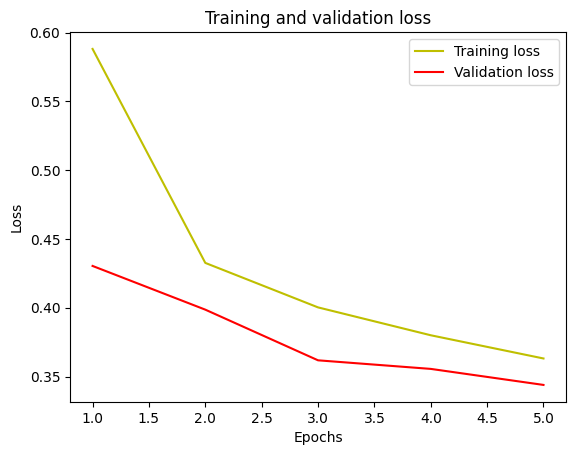

In [34]:
loss = history.history['loss']
val_loss = history.history['val_loss'] # validation 설정 안했으므로 사용x
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss') # 위 comment와 동일
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Validation loss가 더 낮으므로 overfitting이지만,
# 단순 실습이므로 이를 개선하지는 않겠음

추가로 할 것: model save and load, callback, early stopping